In [1]:
# Script to graph the number of TIME for ranked enumeration
## first scenario

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import seaborn as sns

In [2]:
alg_label = ["Original",
             "R. LOUDS Backtrack.", 
             "R. LOUDS Op. Order",
             "R. DFUDS Backtrack.", 
             "R. DFUDS Op. Order"]
        
queries_label = ["j3","j4","p2","p3","p4","s1","s2","s3","s4","t2","t3","t4","ti2","ti3","ti4","tr1","tr2"]

queries_title = ["J3","J4","P2","P3","P4","S1","S2","S3","S4","T2","T3","T4","Ti2","Ti3","Ti4","Tr1","Tr2"]

In [3]:
# box plots for each query
# TODO: change original file, modify file to have cte for k=1,10,100,1000
# TDO hacer un for para cada query y función y tamaño k
j3,j4,p2,p3,p4,s1,s2,s3,s4,t2,t3,t4,ti2,ti3,ti4,tr1,tr2 = [],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]
data = [j3,j4,p2,p3,p4,s1,s2,s3,s4,t2,t3,t4,ti2,ti3,ti4,tr1,tr2]
datasets =[[],[]]
for i,type_fun in enumerate([0]):#,1]):
    file = f"results-f{type_fun}-time.csv"
    print(file)
    
    original = pd.read_csv(f'../../original/results-time-ranked.csv',delimiter=';')
    original = original.head(4)


    rankedLoudsBack = pd.read_csv(f'../../ranked/louds/backtracking/{file}', delimiter=';')
    rankedLoudsNon = pd.read_csv(f'../../ranked/louds/optimalOrder/{file}', delimiter=';')
    rankedDfudsBack = pd.read_csv(f'../../ranked/dfuds/backtracking/{file}', delimiter=';')
    rankedDfudsNon = pd.read_csv(f'../../ranked/dfuds/optimalOrder/{file}', delimiter=';')
    
    datasets[i] = [original,
                    rankedLoudsBack,
                   rankedLoudsNon, 
                   rankedDfudsBack, 
                   rankedDfudsNon]
    
 #   print(i)
    for j,query in enumerate(queries_label):
        data[j] = [original[query],
                         rankedLoudsBack[query], 
                         rankedLoudsNon[query], 
                         rankedDfudsBack[query], 
                         rankedDfudsNon[query]] 

results-f0-time.csv


In [4]:
datasets[0][0]

,k,j3,j4,p2,p3,p4,s1,s2,s3,s4,t2,t3,t4,ti2,ti3,ti4,tr1,tr2
0,1,0.540705,2.80928,0.036055,0.051537,1.34494,0.006059,0.320626,0.220913,0.081693,0.007402,0.073358,41.806,0.041756,1.80333,68.0027,0.001448,0.004598
1,10,0.540705,2.80928,0.036055,0.051537,1.34494,0.006059,0.320626,0.220913,0.081693,0.007402,0.073358,41.806,0.041756,1.80333,68.0027,0.001448,0.004598
2,100,0.540705,2.80928,0.036055,0.051537,1.34494,0.006059,0.320626,0.220913,0.081693,0.007402,0.073358,41.806,0.041756,1.80333,68.0027,0.001448,0.004598
3,1000,0.540705,2.80928,0.036055,0.051537,1.34494,0.006059,0.320626,0.220913,0.081693,0.007402,0.073358,41.806,0.041756,1.80333,68.0027,0.001448,0.004598


In [4]:
# colors:
# https://matplotlib.org/stable/gallery/color/named_colors.html
#colors = ['hotpink','red','peru']#, 'lightsalmon', 'gold', 'dodgerblue', 'darkturquoise', 'mediumspringgreen', 'lime']
colors = ['red','dodgerblue', 'darkturquoise', 'mediumspringgreen', 'lime']
colors = ['#de2d26','#3182bd', '#d95f0e','#dd1c77', '#31a354']
colors = ['#de2d26','#fec44f', '#31a354','#3182bd', '#c51b8a']
linestyles = ['dotted', '-', '-', '-', '-']  # Different patterns
 #'-', '--', '-.', ':', 'None', ' ', '', 'solid', 'dashed', 'dashdot', 'dotted'

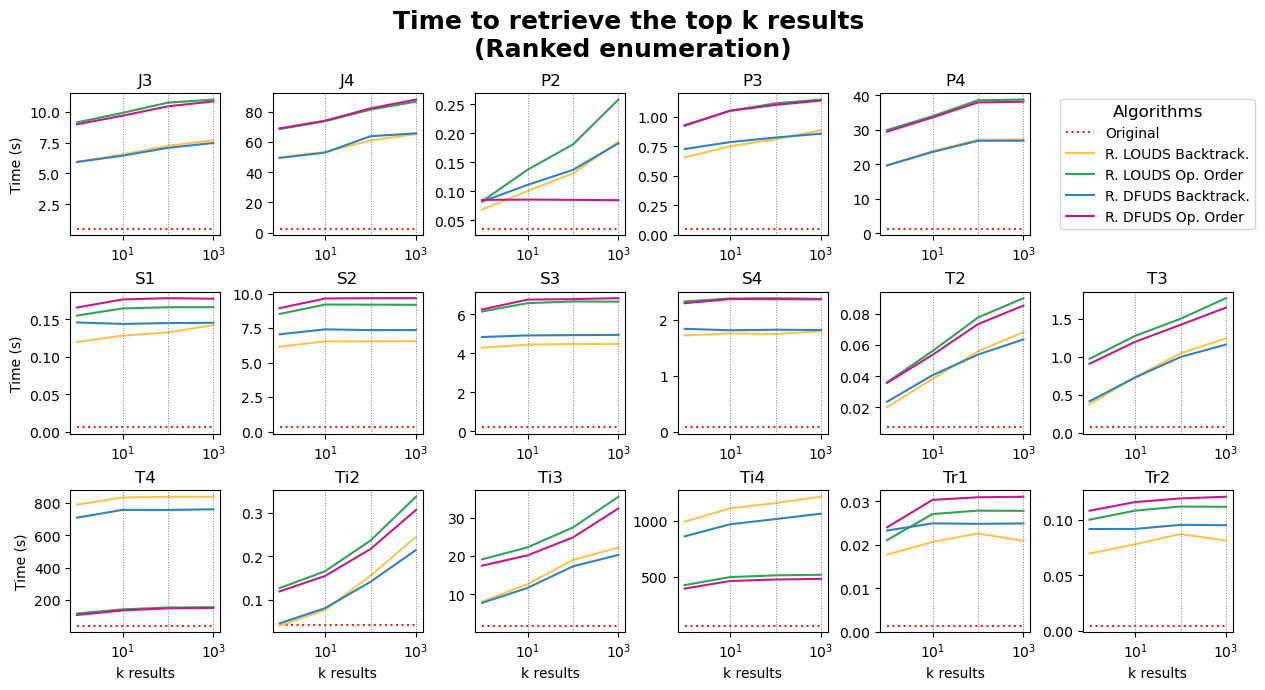

In [10]:
# Crear la figura
fig = plt.figure(figsize=(15, 7))

# Crear un GridSpec con la distribución deseada
gs = gridspec.GridSpec(3, 6, figure=fig, hspace=0.4, wspace=0.35)

# Añadir los subplots a la figura
j3 = fig.add_subplot(gs[0, 0])
j4 = fig.add_subplot(gs[0, 1])
p2 = fig.add_subplot(gs[0, 2])
p3 = fig.add_subplot(gs[0, 3])
p4 = fig.add_subplot(gs[0, 4])
color_legend = fig.add_subplot(gs[0, 5]) # Space for the legend
color_legend.axis('off')  # Hide the axis

s1 = fig.add_subplot(gs[1, 0])
s2 = fig.add_subplot(gs[1, 1])
s3 = fig.add_subplot(gs[1, 2])
s4 = fig.add_subplot(gs[1, 3])
t2 = fig.add_subplot(gs[1, 4])
t3 = fig.add_subplot(gs[1, 5])

t4 = fig.add_subplot(gs[2, 0])
ti2 = fig.add_subplot(gs[2, 1])
ti3 = fig.add_subplot(gs[2, 2])
ti4 = fig.add_subplot(gs[2, 3])
tr1 = fig.add_subplot(gs[2, 4])
tr2 = fig.add_subplot(gs[2, 5])

j3.set_ylabel('Time (s)')
s1.set_ylabel('Time (s)')
t4.set_ylabel('Time (s)')

t4.set_xlabel('k results')
ti2.set_xlabel('k results')
ti3.set_xlabel('k results')
tr1.set_xlabel('k results')
tr2.set_xlabel('k results')
ti4.set_xlabel('k results')

# Adjusting the limits for ti4 (or use log scale)
#ti4.set_yscale('log')  # Use logarithmic scale if the difference is large

#tr1.set_ylabel('Time (ms)')
# plot type_fun = 0
#type_fun=0

# Establecer límites específicos para cada subplot si es necesario
#j3.set_ylim(5, 8)
#s1.set_ylim(1, 30)
#t4.set_ylim(1, 1000)


for i,query in enumerate([j3,j4,p2,p3,p4,s1,s2,s3,s4,t2,t3,t4,ti2,ti3,ti4,tr1,tr2]):
    for j, alg in enumerate(alg_label):
        query.plot(datasets[0][0]['k'], data[i][j], marker='', color=colors[j], linestyle=linestyles[j],label=alg_label[j])
    query.set_xscale('log')
    #query.set_yscale('log')
    query.set_title(queries_title[i])
    query.axvline(x=10, color='gray', linestyle=':', linewidth=0.7)
    query.axvline(x=100, color='gray', linestyle=':', linewidth=0.7)
    query.axvline(x=1000, color='gray', linestyle=':', linewidth=0.7)

handles, labels = j3.get_legend_handles_labels()

color_legend.legend(
    handles,
    labels,
    loc='center',
    fontsize=10,  # Increase font size for the legend
    title='Algorithms',  # Add title
    title_fontsize=12  # Set font size for the title
)

# Global ylabel
#fig.text(0.07, 0.6, 'Number of nodes visited', va='center', rotation='vertical', fontsize=20)

# Add a title to the entire figure
#fig.suptitle('Number of nodes visited per algorithm v/s k', fontsize=18, fontweight='bold')

fig.suptitle('Time to retrieve the top k results \n(Ranked enumeration)', fontsize=18, fontweight='bold', y=1.0)

plt.savefig('/Users/asugomez/Documentos/Magister/Tesis/tesisQdags/imagenes/ranked_variablek-time.pdf')

plt.show()
 

In [ ]:
## second scenario: only plot queries with results > 1000

In [11]:

alg_label = ["Original",
             "R. LOUDS Backtrack.", 
             "R. LOUDS Op. Order",
             "R. DFUDS Backtrack.", 
             "R. DFUDS Op. Order"]
queries_title_v1000 = ["J3","J4","P2","P3","P4","S3","T2","T3","T4","Ti2","Ti3"] #"S3","T3","Ti4 (log scale)"
queries_label_v1000=["j3","j4","p2","p3","p4","s3","t2","t3","t4","ti2","ti3"] # "s3", "t3","ti4"

In [12]:
# Define the values of k to include
desired_k_values = [1, 10, 100, 1000]


j3,j4,p2,p3,p4,s1,s2,s3,s4,t2,t3,t4,ti2,ti3,ti4,tr1,tr2 = [],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]
data_v1000 = [j3,j4,p2,p3,p4,s1,s2,s3,s4,t2,t3,t4,ti2,ti3,ti4,tr1,tr2]
datasets_v1000 =[[],[]]
for i,type_fun in enumerate([0]):#,1]):
    file = f"results-f{type_fun}-v1000-time.csv"
    #print(file)
    
    original = pd.read_csv(f'../../query1000results/original/results-v1000-time-ranked.csv',delimiter=';', index_col=0)
    original = original.head(4)
    
    original = original.loc[:, (original != 0).any(axis=0)]

    
    rankedLoudsBack = pd.read_csv(f'../../query1000results/ranked/louds/backtracking/{file}', delimiter=';', index_col=0)
    rankedLoudsBack = rankedLoudsBack.loc[:, (rankedLoudsBack != 0).any(axis=0)]
    
    rankedLoudsNon = pd.read_csv(f'../../query1000results/ranked/louds/optimalOrder/{file}', delimiter=';', index_col=0)
    rankedLoudsNon = rankedLoudsNon.loc[:, (rankedLoudsNon != 0).any(axis=0)]
    
    rankedDfudsBack = pd.read_csv(f'../../query1000results/ranked/dfuds/backtracking/{file}', delimiter=';', index_col=0)
    rankedDfudsBack = rankedDfudsBack.loc[:, (rankedDfudsBack != 0).any(axis=0)]
    
    rankedDfudsNon = pd.read_csv(f'../../query1000results/ranked/dfuds/optimalOrder/{file}', delimiter=';', index_col=0)
    rankedDfudsNon = rankedDfudsNon.loc[:, (rankedDfudsNon != 0).any(axis=0)]
    
    datasets_v1000[i] = [original,
                            rankedLoudsBack,
                           rankedLoudsNon, 
                           rankedDfudsBack, 
                           rankedDfudsNon]

 #   print(i)
    for j,query in enumerate(queries_label_v1000):
        data_v1000[j] = [original[query],
                         rankedLoudsBack[query], 
                         rankedLoudsNon[query], 
                         rankedDfudsBack[query], 
                         rankedDfudsNon[query]]
        

In [16]:
datasets_v1000[0][0]

,j3,j4,p2,p3,p4,s1,s2,s3,s4,t2,t3,t4,ti2,ti3,ti4,tr1,tr2
k,,,,,,,,,,,,,,,,,
1,1.005,0.207579,0.090514,0.092198,2.16885,NaN,NaN,0.009989,NaN,0.027592,1.86539,4.94968,0.254042,5.04416,324.737,NaN,NaN
10,1.005,0.207579,0.090514,0.092198,2.16885,NaN,NaN,0.009989,NaN,0.027592,1.86539,4.94968,0.254042,5.04416,324.737,NaN,NaN
100,1.005,0.207579,0.090514,0.092198,2.16885,NaN,NaN,0.009989,NaN,0.027592,1.86539,4.94968,0.254042,5.04416,324.737,NaN,NaN
1000,1.005,0.207579,0.090514,0.092198,2.16885,NaN,NaN,0.009989,NaN,0.027592,1.86539,4.94968,0.254042,5.04416,324.737,NaN,NaN


In [11]:
datasets_v1000[0][0].index.tolist()

[1, 10, 100, 1000]

In [12]:
data_v1000[1][0]

k
1       0.207579
10      0.207579
100     0.207579
1000    0.207579
Name: j4, dtype: float64

In [13]:
# colors:
# https://matplotlib.org/stable/gallery/color/named_colors.html
#colors = ['hotpink','red','peru']#, 'lightsalmon', 'gold', 'dodgerblue', 'darkturquoise', 'mediumspringgreen', 'lime']
colors = ['red','dodgerblue', 'darkturquoise', 'mediumspringgreen', 'lime']
colors = ['#de2d26','#3182bd', '#d95f0e','#dd1c77', '#31a354']
colors = ['#de2d26','#fec44f', '#31a354','#3182bd', '#c51b8a']
linestyles = ['dotted', '-', '-', '-', '-']  # Different patterns
 #'-', '--', '-.', ':', 'None', ' ', '', 'solid', 'dashed', 'dashdot', 'dotted'

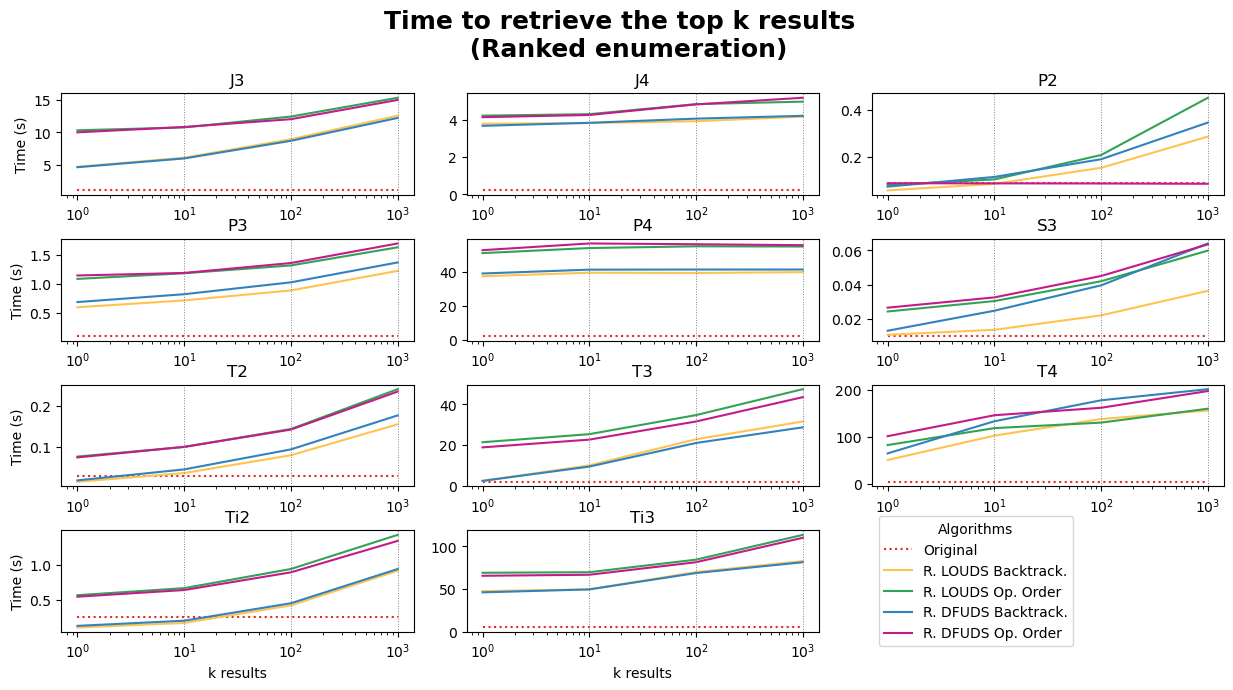

In [17]:
# Crear la figura
fig = plt.figure(figsize=(15, 7))

# Crear un GridSpec con la distribución deseada
gs = gridspec.GridSpec(4, 3, figure=fig, hspace=0.43, wspace=0.15)

# Añadir los subplots a la figura
j3 = fig.add_subplot(gs[0, 0])
j4 = fig.add_subplot(gs[0, 1])
p2 = fig.add_subplot(gs[0, 2])

p3 = fig.add_subplot(gs[1, 0])
p4 = fig.add_subplot(gs[1, 1])
s3 = fig.add_subplot(gs[1, 2])

t2 = fig.add_subplot(gs[2, 0])
t3 = fig.add_subplot(gs[2, 1])
t4 = fig.add_subplot(gs[2, 2])


ti2 = fig.add_subplot(gs[3, 0])
ti3 = fig.add_subplot(gs[3, 1])
color_legend = fig.add_subplot(gs[3, 2]) # Space for the legend
color_legend.axis('off')  # Hide the axis

j3.set_ylabel('Time (s)')
p3.set_ylabel('Time (s)')
t2.set_ylabel('Time (s)')
ti2.set_ylabel('Time (s)')

ti2.set_xlabel('k results')
ti3.set_xlabel('k results')

# Adjusting the limits for ti4 (or use log scale)
#ti3.set_yscale('log')  # Use logarithmic scale if the difference is large


# Establecer límites específicos para cada subplot si es necesario
#j3.set_ylim(5, 8)
#s1.set_ylim(1, 30)
#t4.set_ylim(1, 1000)

for i,query in enumerate([j3,j4,p2,p3,p4,s3,t2,t3,t4,ti2,ti3]): 
    for j, alg in enumerate(alg_label):
        query.plot(datasets_v1000[0][0].index.tolist(), data_v1000[i][j], marker='', color=colors[j], linestyle=linestyles[j],label=alg_label[j])
    query.set_xscale('log')
    #query.set_yscale('log')
    query.set_title(queries_title_v1000[i])
    query.axvline(x=10, color='gray', linestyle=':', linewidth=0.7)
    query.axvline(x=100, color='gray', linestyle=':', linewidth=0.7)
    query.axvline(x=1000, color='gray', linestyle=':', linewidth=0.7)

handles, labels = j3.get_legend_handles_labels()
color_legend.legend(
    handles,
    labels,
    loc='center left',
    fontsize=10,  # Increase font size for the legend
    title='Algorithms',  # Add title
    title_fontsize=10  # Set font size for the title
)

# Global ylabel
#fig.text(0.07, 0.6, 'Number of nodes visited', va='center', rotation='vertical', fontsize=20)

# Add a title to the entire figure
fig.suptitle('Time to retrieve the top k results \n (Ranked enumeration)', fontsize=18, fontweight='bold', y=1.0)


plt.savefig('/Users/asugomez/Documentos/Magister/Tesis/tesisQdags/imagenes/ranked_variablek-v1000-time.pdf')

plt.show()
 

In [58]:
## table